In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
from rasterio.plot import show

1. Anilizar si el recorte de la área de interes lo podria hacer eligiendo un pixel

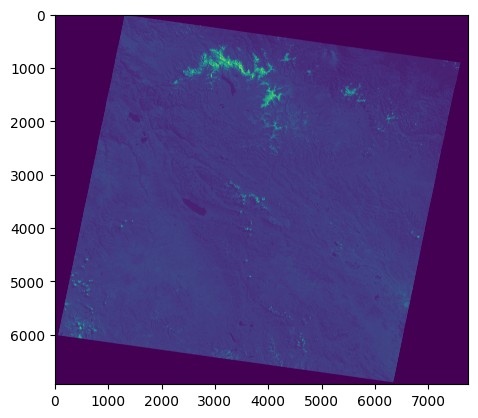

<Axes: >

In [31]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/LT05_L1TP_003070_19910726_20200915_02_T1/LT05_L1TP_003070_19910726_20200915_02_T1_B3.TIF"
img = rasterio.open(dir)
img =img.read(1)
show(img)

Dimensiones de la imagen: 6931x7751, con 1 bandas
El recorte multiespectral de tamaño (1, 512, 512) ha sido guardado en: /home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/recorte_prueba/recorte_multiespectral_512x512.tif


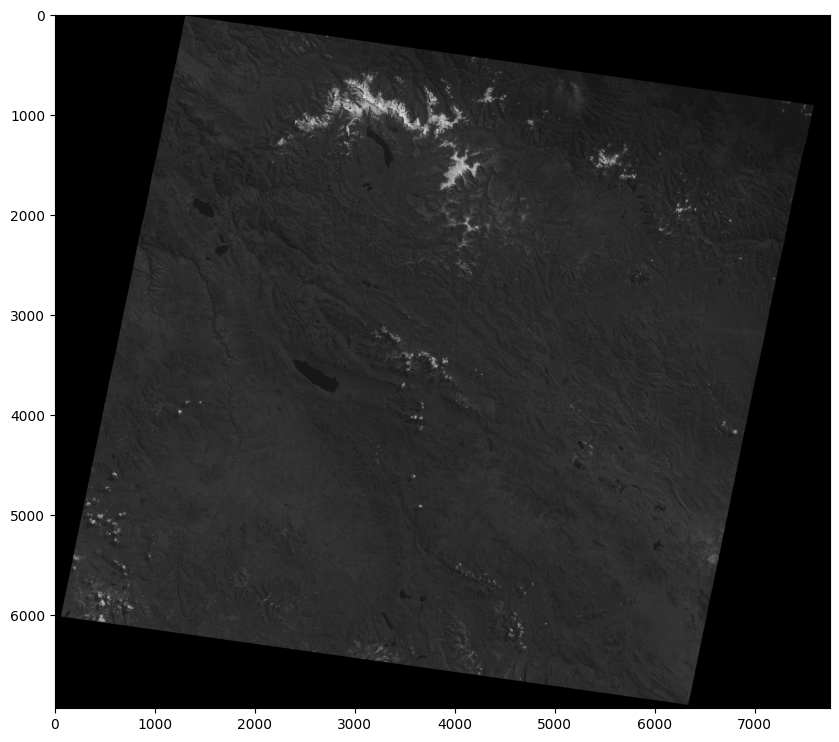

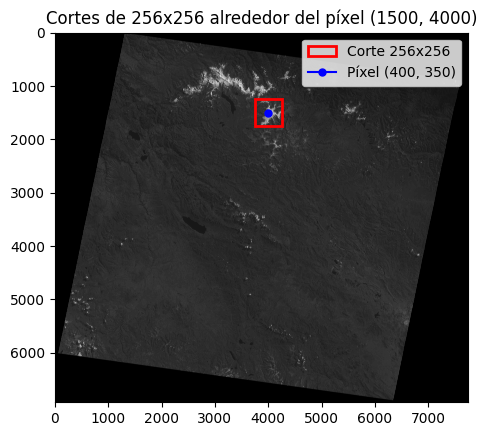

In [36]:
# Ruta de la imagen multiespectral de 6 bandas
ruta_imagen = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/LT05_L1TP_003070_19910726_20200915_02_T1/LT05_L1TP_003070_19910726_20200915_02_T1_B3.TIF"
# Directorio donde guardar los recortes
directorio_salida = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/recorte_prueba/"
os.makedirs(directorio_salida, exist_ok=True)  # Crear la carpeta si no existe
# Dimensiones del corte
tamano_corte = 512
# Fila y columna del píxel de referencia
fila_pixel = 1500
columna_pixel = 4000

with rasterio.open(ruta_imagen) as src:
    # Obtener el número de bandas
    num_bandas = src.count
    # Verificar las dimensiones de la imagen
    alto, ancho = src.height, src.width
    print(f"Dimensiones de la imagen: {alto}x{ancho}, con {num_bandas} bandas")
    # Leer todas las bandas
    imagen_multiespectral = src.read()
    # Asegurarnos de que el corte no exceda los límites de la imagen
    min_fila = max(fila_pixel - tamano_corte // 2, 0)
    max_fila = min(fila_pixel + tamano_corte // 2, alto)
    min_columna = max(columna_pixel - tamano_corte // 2, 0)
    max_columna = min(columna_pixel + tamano_corte // 2, ancho)

    # Realizar el corte para cada banda
    cortes = imagen_multiespectral[:, min_fila:max_fila, min_columna:max_columna]

    # Crear el perfil del archivo para guardar el recorte
    perfil = src.profile
    perfil.update({
        'height': cortes.shape[1],   # 256
        'width': cortes.shape[2],    # 256
        'count': num_bandas,         # 6 bandas
        'dtype': cortes.dtype,       # Tipo de dato de la imagen
    })

    # Guardar el recorte en una nueva imagen GeoTIFF
    ruta_guardado = os.path.join(directorio_salida, "recorte_multiespectral_512x512.tif")
    with rasterio.open(ruta_guardado, 'w', **perfil) as dst:
        dst.write(cortes)
    
    print(f"El recorte multiespectral de tamaño {cortes.shape} ha sido guardado en: {ruta_guardado}")
    
    # Dibujar los cortes en la banda 1 para visualizar las ubicaciones
    banda1 = imagen_multiespectral[0]  # La banda 
    # Visualizar la banda 1
    plt.figure(figsize=(10, 10))
    plt.imshow(banda1, cmap='gray')
    
    # Añadir los rectángulos que representan los cortes
    fig, ax = plt.subplots(1)
    ax.imshow(banda1, cmap='gray')

    # Dibujar un rectángulo que indique el área del corte
    rect = patches.Rectangle(
        (min_columna, min_fila), tamano_corte, tamano_corte, 
        linewidth=2, edgecolor='red', facecolor='none', label='Corte 256x256'
    )
    ax.add_patch(rect)

    # Dibujar el punto de referencia (400, 350)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='blue', label="Píxel (400, 350)")
    
    # Añadir título y leyenda
    plt.title(f'Cortes de 256x256 alrededor del píxel ({fila_pixel}, {columna_pixel})')
    plt.legend()

    # Mostrar la imagen
    plt.show()

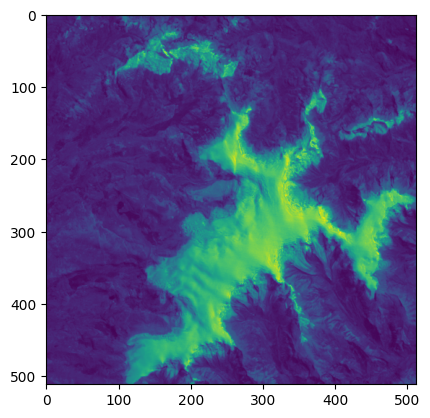

<Axes: >

In [37]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/recorte_prueba/recorte_multiespectral_512x512.tif"
img = rasterio.open(dir)
img =img.read(1)
show(img)

2. Analizando la imagen recortada desde GEE

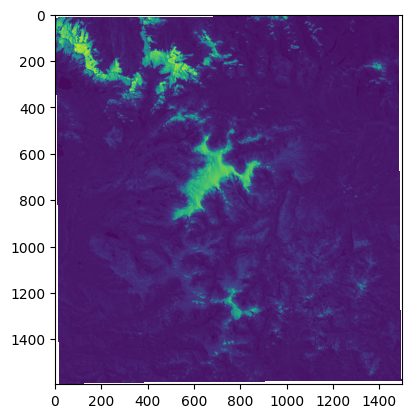

<Axes: >

In [18]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/L8_Topo_Corr_L8_C2L1_20150829_correct_Nasadem.tif"
img = rasterio.open(dir)
img =img.read(1)
show(img)

float64
(1595, 1497)
nan
nan


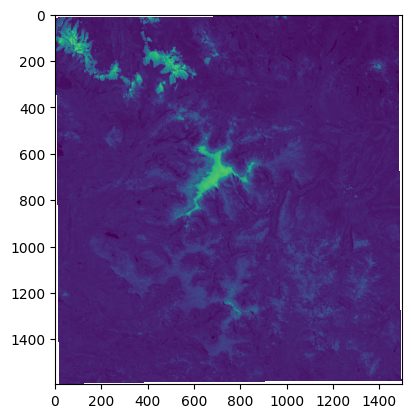

In [3]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/L8_Topo_Corr_L8_C2L1_20240821_correct.tif"
with rasterio.open(dir) as src:
    img = src.read(2)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

Dimensiones de la imagen: 1595x1497, con 6 bandas
El recorte multiespectral de tamaño (6, 512, 512) ha sido guardado en: /home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/GEE/Recorte_L8/2020/recorte_multiespectral_512x512_2020.tif


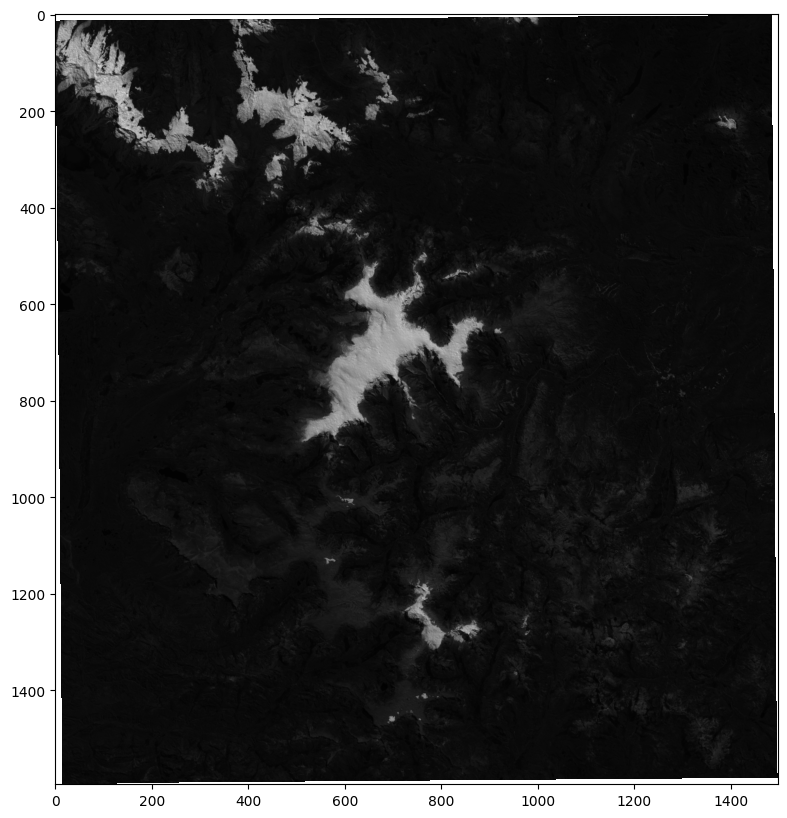

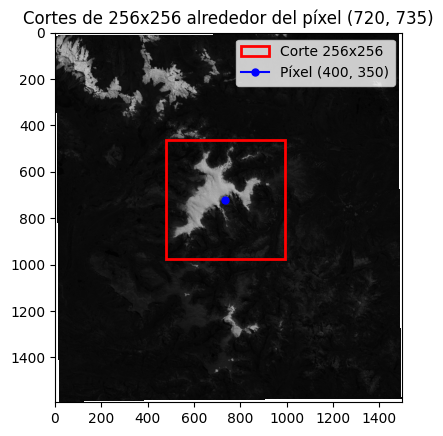

In [19]:
# Ruta de la imagen multiespectral de 6 bandas
ruta_imagen = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/GEE/Recorte_L8/L8_Topo_Corr_L8_C2L1_20200623_correct.tif"
# Directorio donde guardar los recortes
directorio_salida = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/GEE/Recorte_L8/2020/"
os.makedirs(directorio_salida, exist_ok=True)  # Crear la carpeta si no existe
# Dimensiones del corte
tamano_corte = 512
# Fila y columna del píxel de referencia
fila_pixel = 720
columna_pixel = 735

with rasterio.open(ruta_imagen) as src:
    # Obtener el número de bandas
    num_bandas = src.count
    # Verificar las dimensiones de la imagen
    alto, ancho = src.height, src.width
    print(f"Dimensiones de la imagen: {alto}x{ancho}, con {num_bandas} bandas")
    # Leer todas las bandas
    imagen_multiespectral = src.read()
    # Asegurarnos de que el corte no exceda los límites de la imagen
    min_fila = max(fila_pixel - tamano_corte // 2, 0)
    max_fila = min(fila_pixel + tamano_corte // 2, alto)
    min_columna = max(columna_pixel - tamano_corte // 2, 0)
    max_columna = min(columna_pixel + tamano_corte // 2, ancho)

    # Realizar el corte para cada banda
    cortes = imagen_multiespectral[:, min_fila:max_fila, min_columna:max_columna]

    # Crear el perfil del archivo para guardar el recorte
    perfil = src.profile
    perfil.update({
        'height': cortes.shape[1],   # 256
        'width': cortes.shape[2],    # 256
        'count': num_bandas,         # 6 bandas
        'dtype': cortes.dtype,       # Tipo de dato de la imagen
    })

    # Guardar el recorte en una nueva imagen GeoTIFF
    ruta_guardado = os.path.join(directorio_salida, "recorte_multiespectral_512x512_2020.tif")
    with rasterio.open(ruta_guardado, 'w', **perfil) as dst:
        dst.write(cortes)
    
    print(f"El recorte multiespectral de tamaño {cortes.shape} ha sido guardado en: {ruta_guardado}")
    
    # Dibujar los cortes en la banda 1 para visualizar las ubicaciones
    banda1 = imagen_multiespectral[0]  # La banda 
    # Visualizar la banda 1
    plt.figure(figsize=(10, 10))
    plt.imshow(banda1, cmap='gray')
    
    # Añadir los rectángulos que representan los cortes
    fig, ax = plt.subplots(1)
    ax.imshow(banda1, cmap='gray')

    # Dibujar un rectángulo que indique el área del corte
    rect = patches.Rectangle(
        (min_columna, min_fila), tamano_corte, tamano_corte, 
        linewidth=2, edgecolor='red', facecolor='none', label='Corte 256x256'
    )
    ax.add_patch(rect)

    # Dibujar el punto de referencia (400, 350)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='blue', label="Píxel (400, 350)")
    
    # Añadir título y leyenda
    plt.title(f'Cortes de 256x256 alrededor del píxel ({fila_pixel}, {columna_pixel})')
    plt.legend()

    # Mostrar la imagen
    plt.show()


float64
(512, 512)
1.0606903659462028
0.05291929095983505


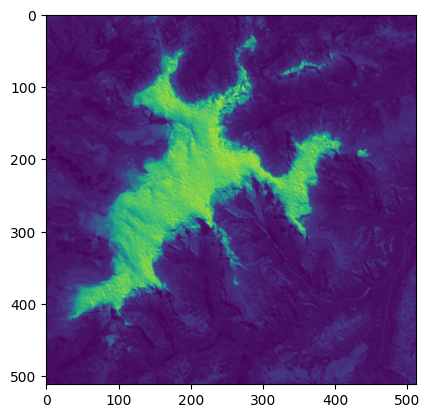

In [20]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/GEE/Recorte_L8/2020/recorte_multiespectral_512x512_2020.tif"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

2.2 Recortando las 4 imagenes del 512x512

In [17]:
import rasterio
import numpy as np
import os

# Ruta de la imagen multiespectral
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/COMPARAR_GEE/RECORTE_003070_19910531/recorte_multiespectral_512x512.tif"

# Definir la carpeta de salida para los recortes
output_dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/COMPARAR_GEE/RECORTE_003070_19910531/recorte_256x256/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Leer la imagen multiespectral
with rasterio.open(dir) as src:
    img = src.read()  # Dimensión (6, 512, 512)
    
    # Obtener los metadatos de la imagen para crear los recortes
    profile = src.profile

    # Dimensiones de la imagen
    channels, height, width = img.shape

    # Definir el tamaño de los recortes
    crop_size = 256

    # Generar los recortes
    crops = []
    for i in range(0, height, crop_size):
        for j in range(0, width, crop_size):
            # Asegurarse de no superar los límites de la imagen
            if i + crop_size <= height and j + crop_size <= width:
                # Recortar la imagen
                crop = img[:, i:i + crop_size, j:j + crop_size]
                crops.append(crop)

                # Crear nombre para cada recorte y guardarlo
                output_filename = os.path.join(output_dir, f"crop_{i}_{j}.tif")
                profile.update({
                    "height": crop_size,
                    "width": crop_size,
                    "transform": rasterio.windows.transform(
                        rasterio.windows.Window(j, i, crop_size, crop_size), src.transform)
                })

                with rasterio.open(output_filename, 'w', **profile) as dst:
                    dst.write(crop)

print(f"Se generaron {len(crops)} recortes.")


Se generaron 4 recortes.


float64
(256, 256)
0.4705733824006276
0.12273287773132324


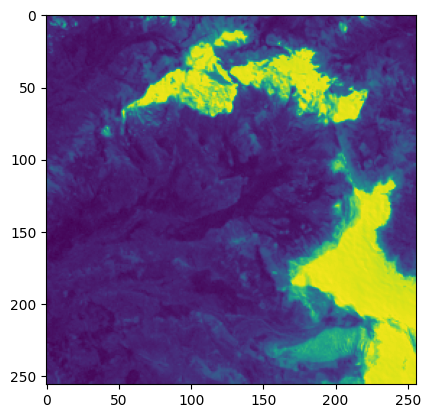

In [19]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/COMPARAR_GEE/RECORTE_003070_19910531/recorte_256x256/crop_0_0.tif"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

3. ANALIZANDO LAS IMAGENES QUE SE RECORTARON DEL AREA DE INTERES A PARTIR DE UNA IMAGEN DE 512X512 DESCARGADO DE USGS

float64
(256, 256)
0.4561290944767887
0.11729706941402837


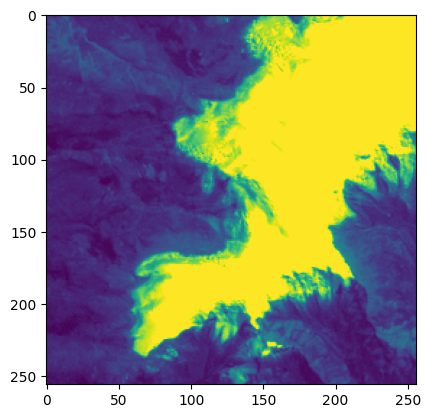

In [45]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/USGS/COMPARAR_USGS/LT05_L1TP_003070_19910726_20200915_02_T1_parches/LT05_L1TP_003070_19910726_20200915_02_T1_002_001.TIF"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

float64
(256, 256)
1.099921627401814
0.04795632111605188


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


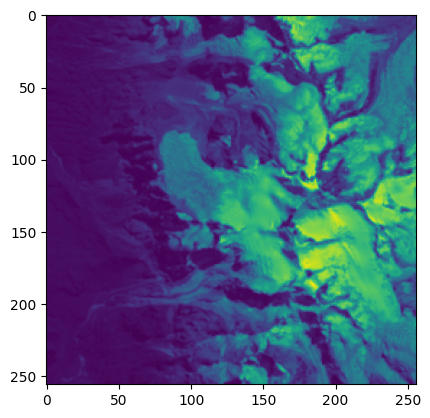

In [25]:
################### ANALIZANDO EL NIVEL DE REFRACTANCIA DE LOS DATOS NUEVOS C2 L1 
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/patch_001071/LC08_L1TP_001071_20160801_20200906_02_T1_parches/LC08_L1TP_001071_20160801_20200906_02_T1_014_005.TIF"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

float64
(256, 256)
1.3443968422338302
0.04544551616164213


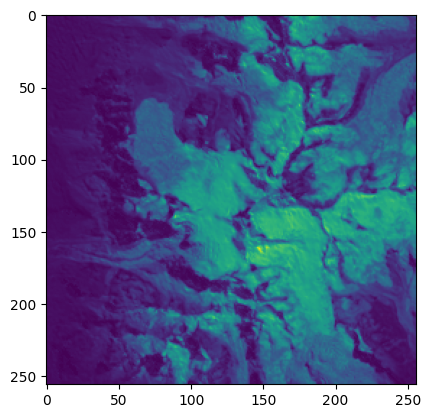

In [39]:
dir = "/home/cornelius/Descargas/recortes/recorte_multiespectral_512x512_patch_001.tif"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

Dimensiones de la imagen: 506x666, con 6 bandas
El recorte multiespectral de tamaño (6, 256, 256) ha sido guardado en: /home/cornelius/Descargas/recortes/recorte_multiespectral_512x512_patch_001.tif


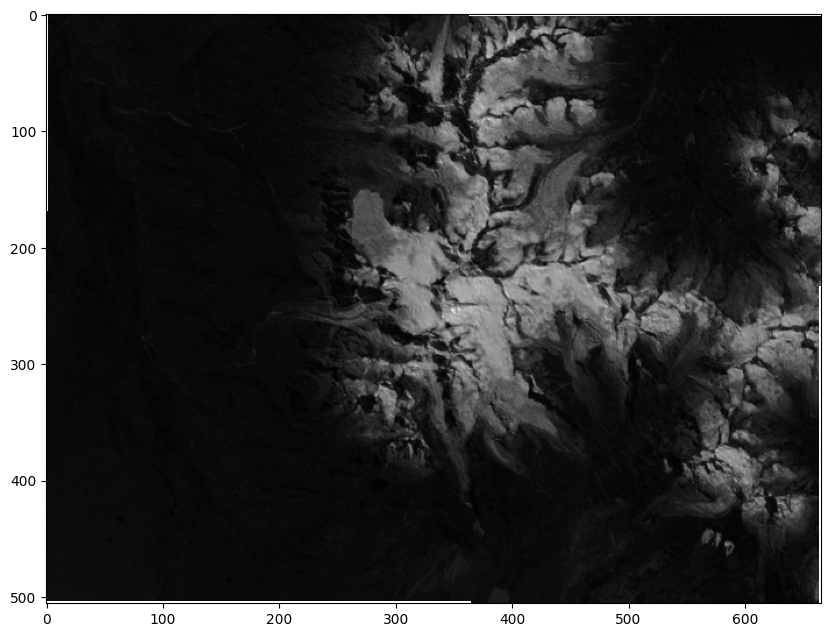

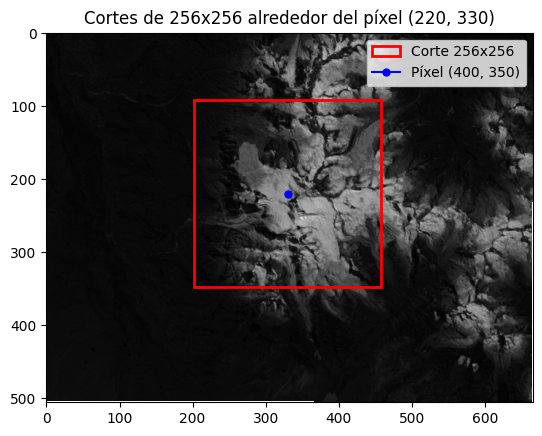

In [37]:
# Ruta de la imagen multiespectral de 6 bandas
ruta_imagen = "/home/cornelius/Documentos/correc_topo/L8_Topo_Corr_6Bands_PATCH_001071 (1).tif"
# Directorio donde guardar los recortes
directorio_salida = "/home/cornelius/Descargas/recortes/"
os.makedirs(directorio_salida, exist_ok=True)  # Crear la carpeta si no existe
# Dimensiones del corte
tamano_corte = 256
# Fila y columna del píxel de referencia
fila_pixel = 220
columna_pixel = 330

with rasterio.open(ruta_imagen) as src:
    # Obtener el número de bandas
    num_bandas = src.count
    # Verificar las dimensiones de la imagen
    alto, ancho = src.height, src.width
    print(f"Dimensiones de la imagen: {alto}x{ancho}, con {num_bandas} bandas")
    # Leer todas las bandas
    imagen_multiespectral = src.read()
    # Asegurarnos de que el corte no exceda los límites de la imagen
    min_fila = max(fila_pixel - tamano_corte // 2, 0)
    max_fila = min(fila_pixel + tamano_corte // 2, alto)
    min_columna = max(columna_pixel - tamano_corte // 2, 0)
    max_columna = min(columna_pixel + tamano_corte // 2, ancho)

    # Realizar el corte para cada banda
    cortes = imagen_multiespectral[:, min_fila:max_fila, min_columna:max_columna]

    # Crear el perfil del archivo para guardar el recorte
    perfil = src.profile
    perfil.update({
        'height': cortes.shape[1],   # 256
        'width': cortes.shape[2],    # 256
        'count': num_bandas,         # 6 bandas
        'dtype': cortes.dtype,       # Tipo de dato de la imagen
    })

    # Guardar el recorte en una nueva imagen GeoTIFF
    ruta_guardado = os.path.join(directorio_salida, "recorte_multiespectral_512x512_patch_001.tif")
    with rasterio.open(ruta_guardado, 'w', **perfil) as dst:
        dst.write(cortes)
    
    print(f"El recorte multiespectral de tamaño {cortes.shape} ha sido guardado en: {ruta_guardado}")
    
    # Dibujar los cortes en la banda 1 para visualizar las ubicaciones
    banda1 = imagen_multiespectral[0]  # La banda 
    # Visualizar la banda 1
    plt.figure(figsize=(10, 10))
    plt.imshow(banda1, cmap='gray')
    
    # Añadir los rectángulos que representan los cortes
    fig, ax = plt.subplots(1)
    ax.imshow(banda1, cmap='gray')

    # Dibujar un rectángulo que indique el área del corte
    rect = patches.Rectangle(
        (min_columna, min_fila), tamano_corte, tamano_corte, 
        linewidth=2, edgecolor='red', facecolor='none', label='Corte 256x256'
    )
    ax.add_patch(rect)

    # Dibujar el punto de referencia (400, 350)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='blue', label="Píxel (400, 350)")
    
    # Añadir título y leyenda
    plt.title(f'Cortes de 256x256 alrededor del píxel ({fila_pixel}, {columna_pixel})')
    plt.legend()

    # Mostrar la imagen
    plt.show()


Valor mínimo antes del reescalado: 0.01229503306951598
Valor máximo antes del reescalado: 1.1011169778391283
Valor original del píxel en (43, 246): 0.46741048171449245
Reflectancia real del píxel en (43, 246): 0.46741048171449245


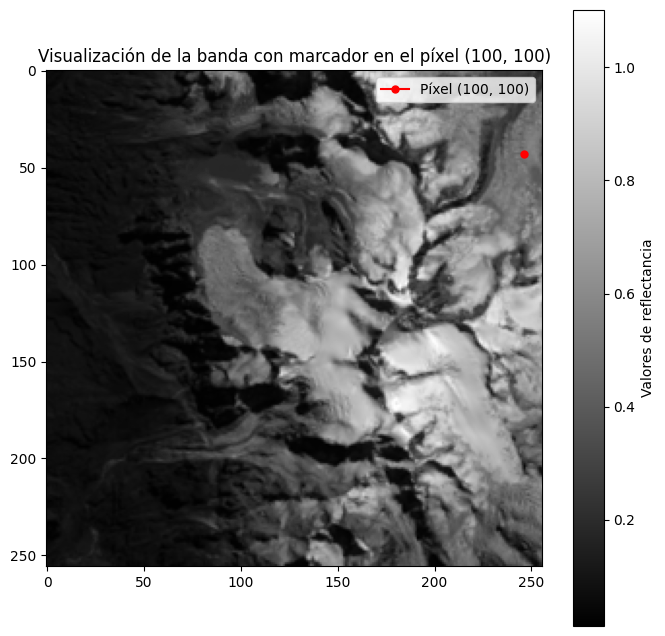

In [63]:
import rasterio
import numpy as np

# Abrir el archivo raster (imagen Landsat 8)
#ruta_imagen = "/run/media/cornelius/Patches_originales/2015/LC08_L2SP_001071_20160817_20200906_02_T1/LC08_L2SP_001071_20160817_20200906_02_T1_SR_B5.TIF"
ruta_imagen = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/patch_001071/LC08_L1TP_001071_20160801_20200906_02_T1_parches_1/LC08_L1TP_001071_20160801_20200906_02_T1_014_005.TIF"

# Leer la imagen usando rasterio
with rasterio.open(ruta_imagen) as src:
    # Cargar los datos de una banda (ej. banda 4: Red)
    banda = src.read(3)  # Puedes cambiar '1' por el número de la banda que te interese

    # Verificar el valor mínimo y máximo de los píxeles antes del reescalado
    valor_min = np.min(banda)
    valor_max = np.max(banda)
    print(f"Valor mínimo antes del reescalado: {valor_min}")
    print(f"Valor máximo antes del reescalado: {valor_max}")


    # Escoger un píxel específico para verificar su reflectancia real
    fila_pixel = 43  # Cambia esto por la fila del píxel que te interese
    columna_pixel = 246  # Cambia esto por la columna del píxel que te interese

    # Obtener el valor original y la reflectancia real del píxel
    valor_pixel_original = banda[fila_pixel, columna_pixel]
    #reflectancia_real = valor_pixel_original / 10000.0
    reflectancia_real = valor_pixel_original



    print(f"Valor original del píxel en ({fila_pixel}, {columna_pixel}): {valor_pixel_original}")
    print(f"Reflectancia real del píxel en ({fila_pixel}, {columna_pixel}): {reflectancia_real}")
    #show(banda)


    # Visualizar la banda usando matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(banda, cmap='gray', vmin=np.min(banda), vmax=np.max(banda))
    #plt.imshow(banda, cmap='gray', vmin=np.min(reflectancia_real), vmax=np.max(reflectancia_real))
    plt.colorbar(label='Valores de reflectancia')

    # Dibujar un punto rojo en el píxel (100, 100)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='red', label="Píxel (100, 100)")
    
    # Añadir título y leyenda
    plt.title('Visualización de la banda con marcador en el píxel (100, 100)')
    plt.legend()

    # Mostrar la imagen
    plt.show()

Valor mínimo antes del reescalado: 0.013917294330894947
Valor máximo antes del reescalado: 1.7761687678010678
Valor original del píxel en (51, 240): 0.4515910598353104
Reflectancia real del píxel en (51, 240): 0.4515910598353104


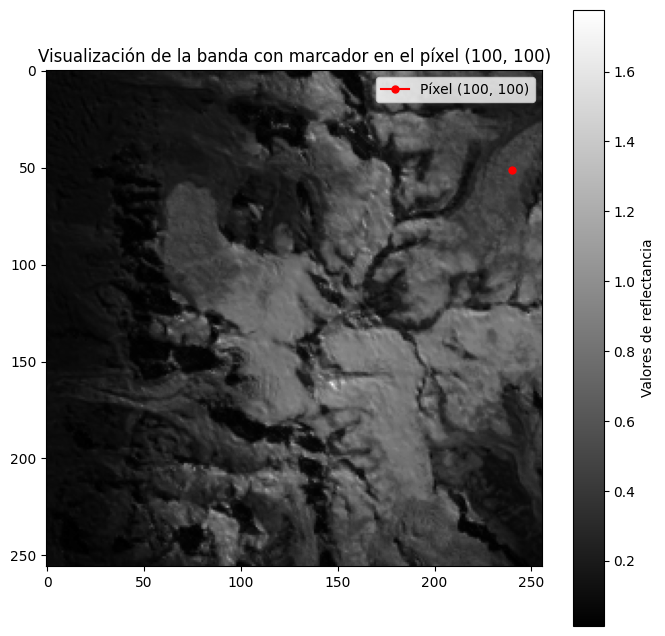

In [67]:
import rasterio
import numpy as np

# Abrir el archivo raster (imagen Landsat 8)
#ruta_imagen = "/run/media/cornelius/Patches_originales/2015/LC08_L2SP_001071_20160817_20200906_02_T1/LC08_L2SP_001071_20160817_20200906_02_T1_SR_B5.TIF"
ruta_imagen = "/home/cornelius/Descargas/recortes/recorte_multiespectral_512x512_patch_001.tif"

# Leer la imagen usando rasterio
with rasterio.open(ruta_imagen) as src:
    # Cargar los datos de una banda (ej. banda 4: Red)
    banda = src.read(3)  # Puedes cambiar '1' por el número de la banda que te interese

    # Verificar el valor mínimo y máximo de los píxeles antes del reescalado
    valor_min = np.min(banda)
    valor_max = np.max(banda)
    print(f"Valor mínimo antes del reescalado: {valor_min}")
    print(f"Valor máximo antes del reescalado: {valor_max}")


    # Escoger un píxel específico para verificar su reflectancia real
    fila_pixel = 51  # Cambia esto por la fila del píxel que te interese
    columna_pixel = 240  # Cambia esto por la columna del píxel que te interese

    # Obtener el valor original y la reflectancia real del píxel
    valor_pixel_original = banda[fila_pixel, columna_pixel]
    #reflectancia_real = valor_pixel_original / 10000.0
    reflectancia_real = valor_pixel_original



    print(f"Valor original del píxel en ({fila_pixel}, {columna_pixel}): {valor_pixel_original}")
    print(f"Reflectancia real del píxel en ({fila_pixel}, {columna_pixel}): {reflectancia_real}")
    #show(banda)


    # Visualizar la banda usando matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(banda, cmap='gray', vmin=np.min(banda), vmax=np.max(banda))
    #plt.imshow(banda, cmap='gray', vmin=np.min(reflectancia_real), vmax=np.max(reflectancia_real))
    plt.colorbar(label='Valores de reflectancia')

    # Dibujar un punto rojo en el píxel (100, 100)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='red', label="Píxel (100, 100)")
    
    # Añadir título y leyenda
    plt.title('Visualización de la banda con marcador en el píxel (100, 100)')
    plt.legend()

    # Mostrar la imagen
    plt.show()

float64
(256, 256)
1.2987619058118616
0.03821410049397147


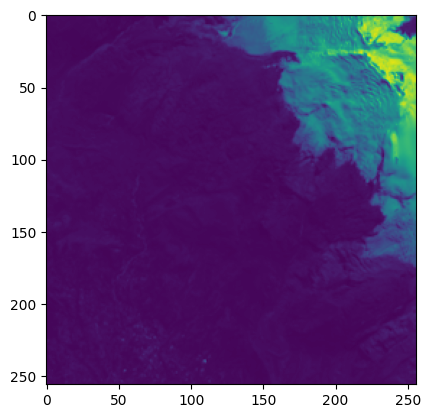

In [10]:
dir = "/home/cornelius/Documentos/Dataset_C2_L1_CRUDO/LC08_L1TP_008066_20180621_20200831_02_T1_022_010.TIF"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

LANDSAT 5

(975, 1168, 3)
(975, 1168, 3)
(975, 1168)
<class 'numpy.ndarray'> float64 nan nan
<class 'numpy.ndarray'> float32 nan nan


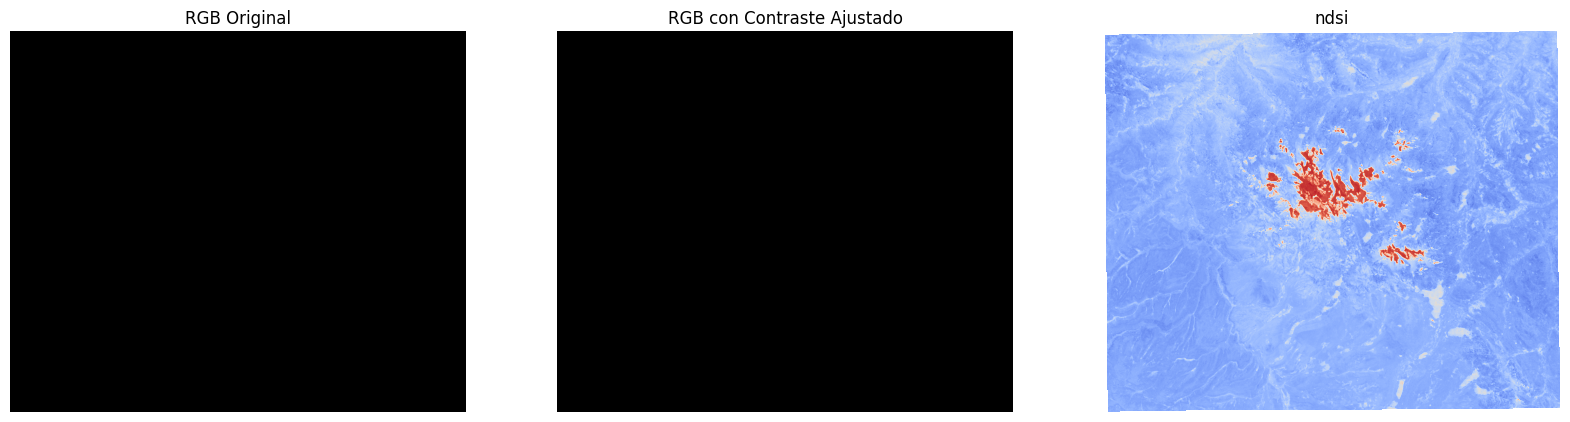

In [16]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para ajustar el contraste usando la técnica de stretching
def contrast_stretch(image, lower_percent=2, higher_percent=99):
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[2]):
        p2, p98 = np.percentile(image[:, :, i], (lower_percent, higher_percent))
        out[:, :, i] = np.clip((image[:, :, i] - p2) / (p98 - p2), 0, 1)
    return out

# Ruta al archivo de imagen satelital
#image_path = "/home/cornelius/Documentos/Glaciar_segmentation_datasets/2023/LC08_L2SP_001071_20230821_20230826_02_T1_parches/LC08_L2SP_001071_20230821_20230826_02_T1_016_009.TIF"
#image_path="/home/cornelius/Documentos/Glaciar_segmentation_datasets/2023/filtro_LC08_L2SP_001071_20230821_20230826_02_T1_parches/LC08_L2SP_007067_20230714_20230724_02_T1_017_001.TIF"
#image_path="/home/cornelius/Descargas/landsat_2014_area_6bands.tif"
image_path = "/home/cornelius/Descargas/L8_Topo_Corr_6Bands_L5.tif"
# Abrir el archivo con rasterio
#image_path="/home/cornelius/Documentos/Landsat8_NDSI/LC08_L1TP_003070_20220731_20220805_02_T1_parchess/LC08_L1TP_003070_20220731_20220805_02_T1_005_004.TIF"
# Leer las bandas de la imagen usando rasterio
with rasterio.open(image_path) as src:
    swir = src.read(5)
    #swir = np.clip(swir, 0, 1)
    nir = src.read(4)
    #nir = np.clip(nir, 0, 1)
    band_red = src.read(3)
    #band_red = np.clip(band_red, 0, 1)
    band_green = src.read(2)
    #band_green = np.clip(band_green, 0, 1)
    band_blue = src.read(1)
    #band_blue = np.clip(band_blue, 0, 1)
    

# Crear una imagen RGB
rgb = np.dstack((band_red, band_green, band_blue))

# Ajustar el contraste de la imagen RGB
rgb_stretched = contrast_stretch(rgb)


def calculate_ndsi(green, swir):
    den=green+swir
    den[den == 0]=np.nan
    return np.divide(green-swir, den, out = np.zeros_like(green), where=den != 0)

def calculate_ndwi(green, nir):
    den=green+nir
    den[den == 0]=np.nan
    return np.divide(green-nir, den, out = np.zeros_like(green), where=den != 0)

#NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDSI=calculate_ndsi(band_green, swir).astype(np.float32)
NDWI=calculate_ndwi(band_green, nir).astype(np.float32)

NDSI_RES=NDSI-NDWI


#show(NDSI, cmap='RdYlBu')
#show(NDSI, cmap='coolwarm')

###############################
print(rgb.shape)
print(rgb_stretched.shape)
print(NDSI.shape)
print(type(rgb), rgb.dtype, np.max(rgb), np.min(rgb))
print(type(NDSI), NDSI.dtype, np.max(NDSI), np.min(NDSI))
##############################



# Mostrar la imagen RGB original y la ajustada
fig, ax = plt.subplots(1, 3, figsize=(20, 18))

ax[0].imshow(rgb / np.max(rgb))
ax[0].set_title('RGB Original')
ax[0].axis('off')

ax[1].imshow(rgb_stretched)
ax[1].set_title('RGB con Contraste Ajustado')
ax[1].axis('off')

#ax[2].imshow(NDSI, cmap='coolwarm')
ax[2].imshow(NDSI_RES, cmap='coolwarm')
ax[2].set_title('ndsi')
ax[2].axis('off')

plt.show()

Dimensiones de la imagen: 975x1168, con 6 bandas
El recorte multiespectral de tamaño (6, 512, 512) ha sido guardado en: /home/cornelius/Descargas/recortes/RECORTE_512X512/recorte_multiespectral_512x512.tif


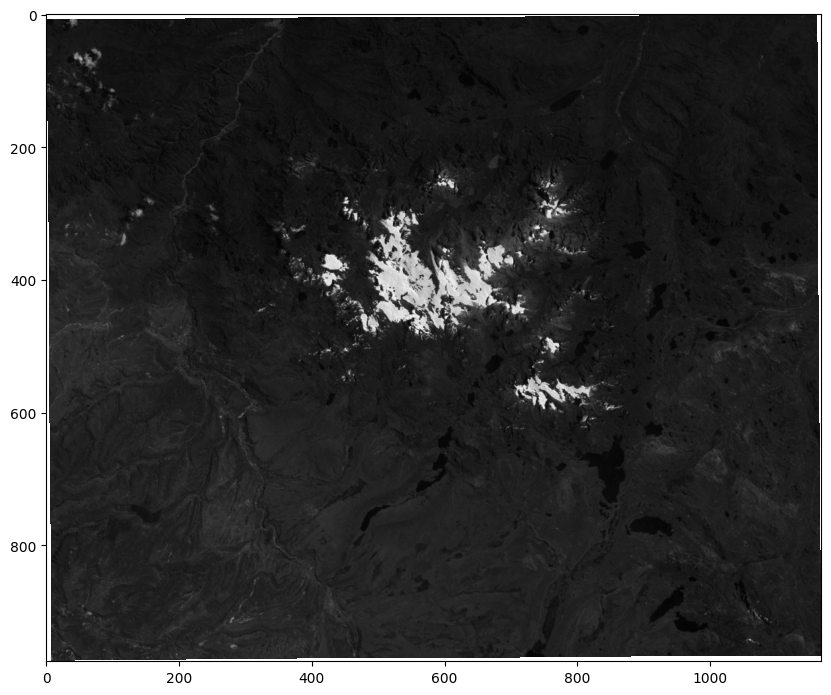

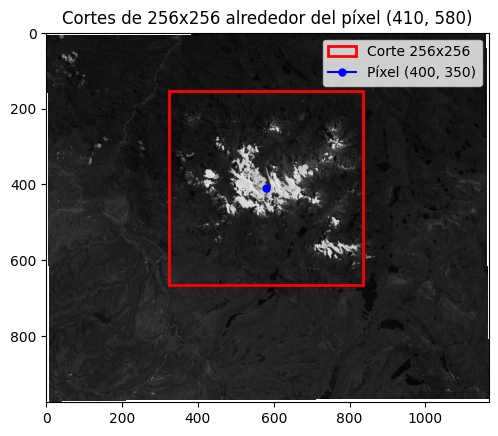

In [21]:
# Ruta de la imagen multiespectral de 6 bandas
ruta_imagen = "/home/cornelius/Descargas/L8_Topo_Corr_6Bands_L5 (1).tif"
# Directorio donde guardar los recortes
directorio_salida = "/home/cornelius/Descargas/recortes/RECORTE_512X512/"
os.makedirs(directorio_salida, exist_ok=True)  # Crear la carpeta si no existe
# Dimensiones del corte
tamano_corte = 512
# Fila y columna del píxel de referencia
fila_pixel = 410
columna_pixel = 580

with rasterio.open(ruta_imagen) as src:
    # Obtener el número de bandas
    num_bandas = src.count
    # Verificar las dimensiones de la imagen
    alto, ancho = src.height, src.width
    print(f"Dimensiones de la imagen: {alto}x{ancho}, con {num_bandas} bandas")
    # Leer todas las bandas
    imagen_multiespectral = src.read()
    # Asegurarnos de que el corte no exceda los límites de la imagen
    min_fila = max(fila_pixel - tamano_corte // 2, 0)
    max_fila = min(fila_pixel + tamano_corte // 2, alto)
    min_columna = max(columna_pixel - tamano_corte // 2, 0)
    max_columna = min(columna_pixel + tamano_corte // 2, ancho)

    # Realizar el corte para cada banda
    cortes = imagen_multiespectral[:, min_fila:max_fila, min_columna:max_columna]

    # Crear el perfil del archivo para guardar el recorte
    perfil = src.profile
    perfil.update({
        'height': cortes.shape[1],   # 256
        'width': cortes.shape[2],    # 256
        'count': num_bandas,         # 6 bandas
        'dtype': cortes.dtype,       # Tipo de dato de la imagen
    })

    # Guardar el recorte en una nueva imagen GeoTIFF
    ruta_guardado = os.path.join(directorio_salida, "recorte_multiespectral_512x512.tif")
    with rasterio.open(ruta_guardado, 'w', **perfil) as dst:
        dst.write(cortes)
    
    print(f"El recorte multiespectral de tamaño {cortes.shape} ha sido guardado en: {ruta_guardado}")
    
    # Dibujar los cortes en la banda 1 para visualizar las ubicaciones
    banda1 = imagen_multiespectral[0]  # La banda 
    # Visualizar la banda 1
    plt.figure(figsize=(10, 10))
    plt.imshow(banda1, cmap='gray')
    
    # Añadir los rectángulos que representan los cortes
    fig, ax = plt.subplots(1)
    ax.imshow(banda1, cmap='gray')

    # Dibujar un rectángulo que indique el área del corte
    rect = patches.Rectangle(
        (min_columna, min_fila), tamano_corte, tamano_corte, 
        linewidth=2, edgecolor='red', facecolor='none', label='Corte 256x256'
    )
    ax.add_patch(rect)

    # Dibujar el punto de referencia (400, 350)
    plt.plot(columna_pixel, fila_pixel, marker='o', markersize=5, color='blue', label="Píxel (400, 350)")
    
    # Añadir título y leyenda
    plt.title(f'Cortes de 256x256 alrededor del píxel ({fila_pixel}, {columna_pixel})')
    plt.legend()

    # Mostrar la imagen
    plt.show()

float64
(512, 512)
0.48694305926228837
0.04148796905742418


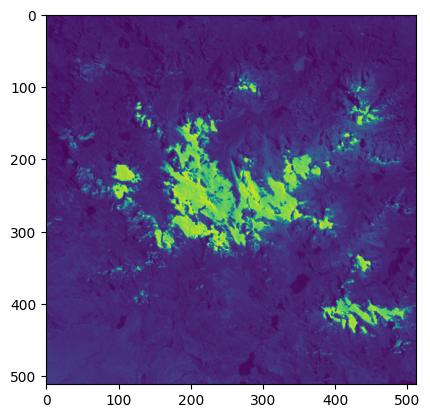

In [22]:
dir = "/home/cornelius/Descargas/recortes/RECORTE_512X512/recorte_multiespectral_512x512.tif"
with rasterio.open(dir) as src:
    img = src.read(1)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

In [23]:
import rasterio
import numpy as np
import os

# Ruta de la imagen multiespectral
dir = "/home/cornelius/Descargas/recortes/RECORTE_512X512/recorte_multiespectral_512x512.tif"

# Definir la carpeta de salida para los recortes
output_dir = "/home/cornelius/Descargas/recortes/RECORTE_LANSAT5/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Leer la imagen multiespectral
with rasterio.open(dir) as src:
    img = src.read()  # Dimensión (6, 512, 512)
    
    # Obtener los metadatos de la imagen para crear los recortes
    profile = src.profile

    # Dimensiones de la imagen
    channels, height, width = img.shape

    # Definir el tamaño de los recortes
    crop_size = 256

    # Generar los recortes
    crops = []
    for i in range(0, height, crop_size):
        for j in range(0, width, crop_size):
            # Asegurarse de no superar los límites de la imagen
            if i + crop_size <= height and j + crop_size <= width:
                # Recortar la imagen
                crop = img[:, i:i + crop_size, j:j + crop_size]
                crops.append(crop)

                # Crear nombre para cada recorte y guardarlo
                output_filename = os.path.join(output_dir, f"crop_{i}_{j}.tif")
                profile.update({
                    "height": crop_size,
                    "width": crop_size,
                    "transform": rasterio.windows.transform(
                        rasterio.windows.Window(j, i, crop_size, crop_size), src.transform)
                })

                with rasterio.open(output_filename, 'w', **profile) as dst:
                    dst.write(crop)

print(f"Se generaron {len(crops)} recortes.")


Se generaron 4 recortes.


float64
(256, 256)
0.9961525891090948
0.025750839570616146


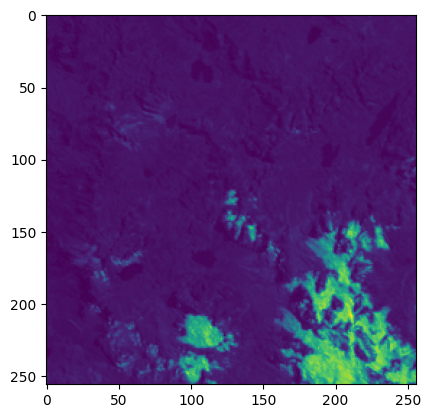

In [98]:
dir = "/home/cornelius/Descargas/recortes/RECORTE_LANSAT5/crop_0_0.tif"
with rasterio.open(dir) as src:
    img = src.read(2)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

LANDSAT 5, DESCARGADOS A TRAVEZ DE USGS

In [23]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Glaciar_data_L5/images_data/LT05_L1TP_001071_19910728_20200915_02_T1_013_010.TIF"
with rasterio.open(dir) as src:
    img = src.read()
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    #show(img)

float64
(6, 256, 256)
0.9751567077089258
0.0030307424168267254


/home/cornelius/miniconda3/envs/pytorch_watnet/lib/python3.11/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


float64
(256, 256)
0.6547335863032808
0.0099405284930646


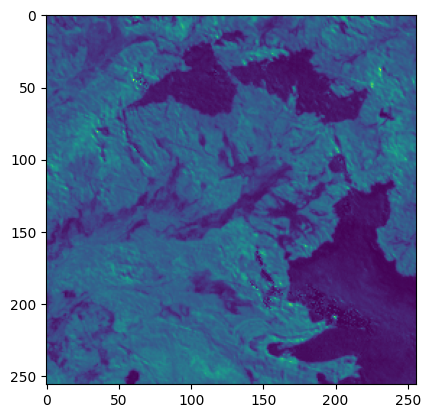

In [30]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Analisis_temporal/GEE/RECORTE_GEE_LT05_L1TP_003070_19910531_parches/RECORTE_GEE_LT05_L1TP_003070_19910531_001_001.TIF"
with rasterio.open(dir) as src:
    img = src.read(6)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

LANSAT 5 CROPPING

float64
(256, 256)
0.38526255392774095
0.0061801679946139575


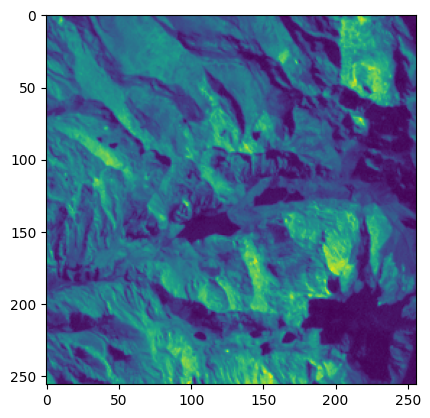

In [9]:
dir = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/landsat5_C2L1/LANDSAT5_CRUDO_PATCHS/LT05_L1TP_008066_19910814_20200915_02_T1_014_008.TIF"
with rasterio.open(dir) as src:
    img = src.read(6)
    print(img.dtype)
    print(img.shape)
    print(np.max(img))
    print(np.min(img))
    show(img)

float64
(256, 256, 3)
(256, 256, 3)
(256, 256)
<class 'numpy.ndarray'> float64 0.9870938424086718 0.09311354214447583
<class 'numpy.ndarray'> float32 0.8778498 -0.44413444


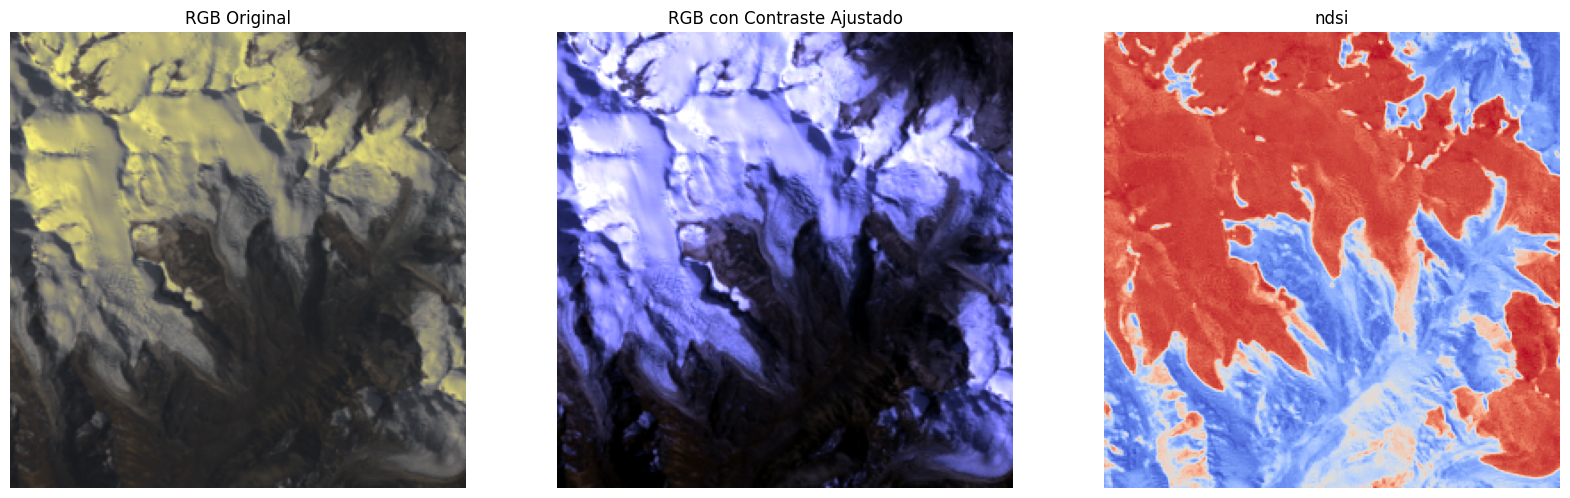

In [4]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
import os

# Función para ajustar el contraste usando la técnica de stretching
def contrast_stretch(image, lower_percent=2, higher_percent=99):
    out = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[2]):
        p2, p98 = np.percentile(image[:, :, i], (lower_percent, higher_percent))
        out[:, :, i] = np.clip((image[:, :, i] - p2) / (p98 - p2), 0, 1)
    return out

# Ruta al archivo de imagen satelital
#image_path = "/home/cornelius/Documentos/Glaciar_segmentation_datasets/2023/LC08_L2SP_001071_20230821_20230826_02_T1_parches/LC08_L2SP_001071_20230821_20230826_02_T1_016_009.TIF"
#image_path="/home/cornelius/Documentos/Glaciar_segmentation_datasets/2023/filtro_LC08_L2SP_001071_20230821_20230826_02_T1_parches/LC08_L2SP_007067_20230714_20230724_02_T1_017_001.TIF"
#image_path="/home/cornelius/Descargas/landsat_2014_area_6bands.tif"
image_path = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Glaciar_data_L5/LANDSAT5_CRUDO_PATCHS/LT05_L1TP_001071_19910728_20200915_02_T1_014_010.TIF"
#image_path = "/home/cornelius/Documentos/Glaciar_dataset_C2_L1/Glaciar_data_L5/LANDSAT5_CRUDO_RGB/LT05_L1TP_001071_19910728_20200915_02_T1_014_010.TIF"
# Abrir el archivo con rasterio
#image_path="/home/cornelius/Documentos/Landsat8_NDSI/LC08_L1TP_003070_20220731_20220805_02_T1_parchess/LC08_L1TP_003070_20220731_20220805_02_T1_005_004.TIF"
# Leer las bandas de la imagen usando rasterio
with rasterio.open(image_path) as src:
    swir = src.read(5)
    print(swir.dtype)
    #swir = np.clip(swir, 0, 1)
    nir = src.read(4)
    #nir = np.clip(nir, 0, 1)
    band_red = src.read(3)
    #band_red = np.clip(band_red, 0, 1)
    band_green = src.read(2)
    #band_green = np.clip(band_green, 0, 1)
    band_blue = src.read(1)
    #band_blue = np.clip(band_blue, 0, 1)
    

# Crear una imagen RGB
rgb = np.dstack((band_red, band_green, band_blue))

# Ajustar el contraste de la imagen RGB
rgb_stretched = contrast_stretch(rgb)


def calculate_ndsi(green, swir):
    den=green+swir
    den[den == 0]=np.nan
    return np.divide(green-swir, den, out = np.zeros_like(green), where=den != 0)

def calculate_ndwi(green, nir):
    den=green+nir
    den[den == 0]=np.nan
    return np.divide(green-nir, den, out = np.zeros_like(green), where=den != 0)

#NDSI=calculate_ndsi(band_green, swir).astype(np.float64)
NDSI=calculate_ndsi(band_green, swir).astype(np.float32)
NDWI=calculate_ndwi(band_green, nir).astype(np.float32)

NDSI_RES=NDSI-NDWI


#show(NDSI, cmap='RdYlBu')
#show(NDSI, cmap='coolwarm')

###############################
print(rgb.shape)
print(rgb_stretched.shape)
print(NDSI.shape)
print(type(rgb), rgb.dtype, np.max(rgb), np.min(rgb))
print(type(NDSI), NDSI.dtype, np.max(NDSI), np.min(NDSI))
##############################



# Mostrar la imagen RGB original y la ajustada
fig, ax = plt.subplots(1, 3, figsize=(20, 18))

ax[0].imshow(rgb / np.max(rgb))
ax[0].set_title('RGB Original')
ax[0].axis('off')

ax[1].imshow(rgb_stretched)
ax[1].set_title('RGB con Contraste Ajustado')
ax[1].axis('off')

#ax[2].imshow(NDSI, cmap='coolwarm')
ax[2].imshow(NDSI_RES, cmap='coolwarm')
ax[2].set_title('ndsi')
ax[2].axis('off')

plt.show()

In [47]:
a = [1,2,3,4,5,6]
b = [2,2,2,2,2,2]
d=2
e = []
c = [(x * y)/d for x, y in zip(a, b)]
for m in range(len(a)):
    n=(a[m]*b[m])/d
    e.append(n)

print(c)
print(e)

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


In [60]:
import math
a=[0.0012718, 0.0026579, 0.0022619, 0.0027377, 0.0018537, 0.0025732]
b=[-0.003796, -0.00787, -0.004797, -0.007457, -0.007553, -0.008461]

c= (a[0]+ a[1]+a[2]+a[3]+a[4]+a[5])/6
print(c)
d= (b[0]+ b[1]+b[2]+b[3]+b[4]+b[5])/6
print(d)

x= math.sin(math.radians(42.68002107))
print(x)

0.0022260333333333332
-0.0066556666666666665
0.6779033653144297


In [ ]:
"""
def crop_image(image, output_size=5888):
    # Asegurarse de que la imagen tenga un tamaño mayor que el output_size
    height, width = image.shape[:2]

    if height < output_size or width < output_size:
        print(f"Imagen demasiado pequeña para recortar a {output_size}. Tamaño actual: {(height, width)}")
        return None  # O manejar este caso adecuadamente

    # Calcular el punto central para recortar
    center_y, center_x = height // 2, width // 2
    half_output_size = output_size // 2

    # Recortar la imagen en base al centro
    cropped_image = image[center_y - half_output_size : center_y + half_output_size,
                          center_x - half_output_size : center_x + half_output_size]

    # Verificar si se realizó el recorte correctamente
    if cropped_image.shape[0] != output_size or cropped_image.shape[1] != output_size:
        print("El recorte no pudo ser realizado correctamente.")
        return None  # También podrías manejarlo de otra forma

    # Asignar el recorte a new_img
    new_img = cropped_image

    # Ajustar el tamaño si es necesario (por ejemplo, a través de interpolación)
    new_img = adjust_size(new_img, output_size=output_size)

    return new_img

"""
# comentarios

"""

def crop_image(img=None, output_size=256):
  img_gray = img[:, :, 0]
  img_gray = cv2.GaussianBlur(img[:,:,0], (11, 11), 0)
  val, bin_mask = cv2.threshold(img_gray,1,255,cv2.THRESH_BINARY)
  edged = cv2.Canny(np.uint8(bin_mask), 10, 250, apertureSize=3)
  (cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  idx = 0
  for c in cnts:
      x,y,w,h = cv2.boundingRect(c)
      if w>200 and h>200:
          idx+=1
          pad_x, pad_y = 100, 100
          new_img=img[y+pad_y:y+h-pad_y,x+pad_x:x+w-pad_x]

  new_img = adjust_size(new_img, output_size=output_size)
  return new_img
"""

In [ ]:
image = open_bands_and_deskew([2,3,4,5,6,7], direccion)

directorio_parches = f'{direccion}_parches/'

alto = image.shape[0]
ancho = image.shape[1]

parche_size = 256

profile = {
    'count' : image.shape[2],
    'height' : parche_size,
    'width' : parche_size,
    'dtype' : 'float64'
}


if not os.path.exists(directorio_parches):
    os.makedirs(directorio_parches)

for i, y in enumerate(range(0, alto, parche_size)):
    for j, x in enumerate(range(0, ancho, parche_size)):
        parche = image[y:y+parche_size, x:x+parche_size]
        parche = parche.transpose(2, 0, 1)
        nombre_parche = f"{direccion}_{i+1:03d}_{j+1:03d}.TIF"/home/cornelius/Documentos/Glaciar_dataset_C2_L1/landsat5_C2L1/patch_003070/
        ruta_parche = os.path.join(directorio_parches, nombre_parche)
        #"""

        with rasterio.open(ruta_parche, 'w', **profile) as dst:
            dst.write(parche)
        #"""






# Extraer la primera banda
first_band = image[:, :, 0]

# Normalizar la banda a 8 bits (0-255) para visualización
first_band_normalized = cv2.normalize(first_band, None, 0, 255, cv2.NORM_MINMAX)
first_band_normalized = np.uint8(first_band_normalized)

# Convertir la banda a una imagen en escala de grises
image_with_grid = cv2.cvtColor(first_band_normalized, cv2.COLOR_GRAY2BGR)

# Dibujar los recortes en la imagen
for y in range(0, alto, parche_size):
    for x in range(0, ancho, parche_size):
        cv2.rectangle(image_with_grid, (x, y), (x + parche_size, y + parche_size), (0, 255, 0), 2)



############################################
# Guardar la imagen con el grid de recortes en un directorio específico
output_directory ="/home/cornelius/Documentos/Glaciar_dataset_C2_L1/patch_001071/Grid_patch_001071/"
#output_directory = f'{direccion}_grid/'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

output_path = os.path.join(output_directory, f'{direccion}_grid.png')
cv2.imwrite(output_path, image_with_grid)

print(f'Imagen con grid guardada en: {output_path}')
#########################################################


# Mostrar la imagen con los recortes
plt.figure(figsize=(10, 10))
plt.imshow(image_with_grid)
plt.title('Zonas de recorte patch 001071')
plt.axis('off')
plt.show()